# CNN Python Implementation

To classify given image in to 10 classes of ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train,y_train), (x_test,y_test) = cifar10.load_data() #50000 data in training and 10000 data in testing

In [4]:
x_train.shape

(50000, 32, 32, 3)

### 2. Visualize the First 24 Training Images

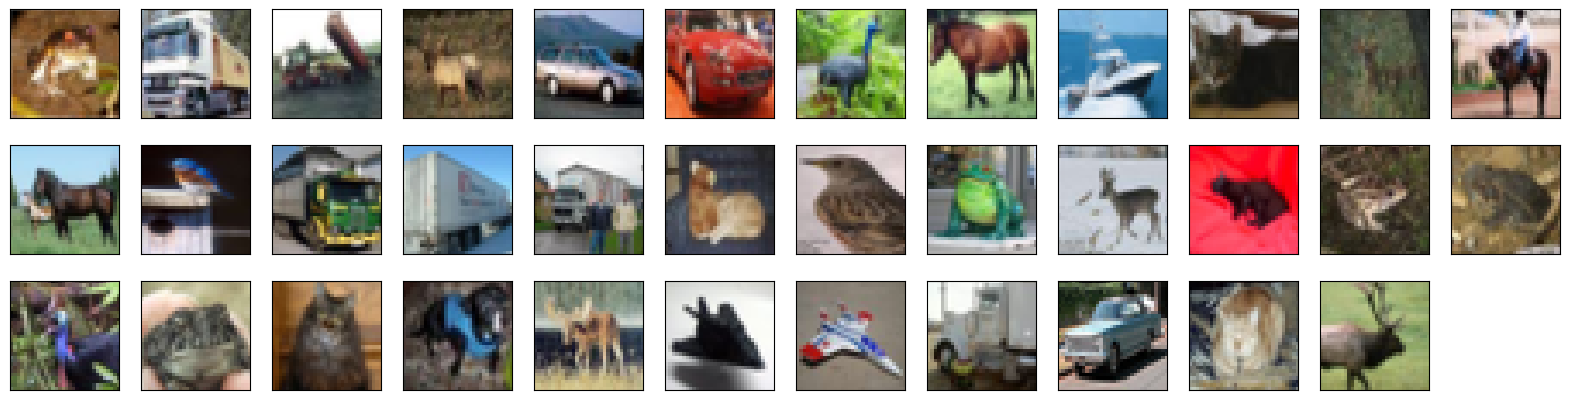

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5)) # size definition of canvas
for i in range(35):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[]) # size definition of each image 
    ax.imshow(np.squeeze(x_train[i])) # showing 35 images in the defined canvas through loop range

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the
same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on
the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [9]:
from keras.utils import to_categorical

# one-hot encode the labels
num_classes = len(np.unique(y_train)) # how many unique classes are there in target column
y_train = keras.utils.to_categorical(y_train, num_classes) #Conver the array value(Class vector) into matrix
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train,x_valid) = x_train[5000:], x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape) # Output like How many number of images, image size, image size, How mant channels(RGB)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'Validation Sample')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 Validation Sample


In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### 5. Define the Model Architecture

In [12]:
from keras.models import Sequential
# importing the architecture of the model:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(32, 32, 3)))
#16 filters with 3X3 kernel with padding size same as iput and output
model.add(MaxPooling2D(pool_size=2))  # 2x2 metrix to pull the Max value from the convoluted image metrix
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3)) # 30% nurons are deactivated/ drop to avoid overfitting, which means it(30%) will not go to fully_connected_layer
model.add(Flatten())# Coverting data into 1D array
model.add(Dense(500, activation='relu')) #500 nurons with relu Activation Function #ANN
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax')) # for multi class classification we use activation=softmax, for binary, it will be sigmoid

model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

### 6. Compile the Model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss- calculates the loss 
# optimizer - responsible for updating weights and biases
# metrics - which metrix we want to see our model's performance

### 7. Train the Model

In [16]:
from keras.callbacks import ModelCheckpoint #callbacks are used to save the best weights for our model

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True) # save the model as model.weights.best.keras file

hist = model.fit(x_train, y_train, batch_size=32, epochs=2,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer],
          verbose=1, shuffle=True)

# batch_size - The number of training examples used in one iteration of model training. A batch size of 32 means that the model will be trained on 32 samples before updating the weights.
# callback - Functions or objects that are passed to the training process to enable specific actions during training. For instance, callbacks can be used for early stopping (to halt training when performance plateaus) or saving the model at certain points.
# epoch - The number of times the entire training dataset is passed forward and backward through the neural network. For example, if you set 10 epochs, the model will go through the entire training data 10 times
# shuffle- Refers to the process of randomly reordering the training data before each epoch. Shuffling helps in improving the training process by ensuring that the model does not learn the order of the data

Epoch 1/2
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3499 - loss: 1.7674
Epoch 1: val_loss improved from inf to 1.22559, saving model to model.weights.best.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3503 - loss: 1.7663 - val_accuracy: 0.5730 - val_loss: 1.2256
Epoch 2/2
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5647 - loss: 1.2180
Epoch 2: val_loss improved from 1.22559 to 0.97715, saving model to model.weights.best.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5647 - loss: 1.2179 - val_accuracy: 0.6618 - val_loss: 0.9772


In [ ]:
# If we increase epoch i.e. epoch=10, the accuracy will increase and loss will decrease

### 8. Load the Model with the Best Validation Accuracy

In [18]:
model.load_weights('model.weights.best.keras')

### 9. Visualize Some Predictions

In [20]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


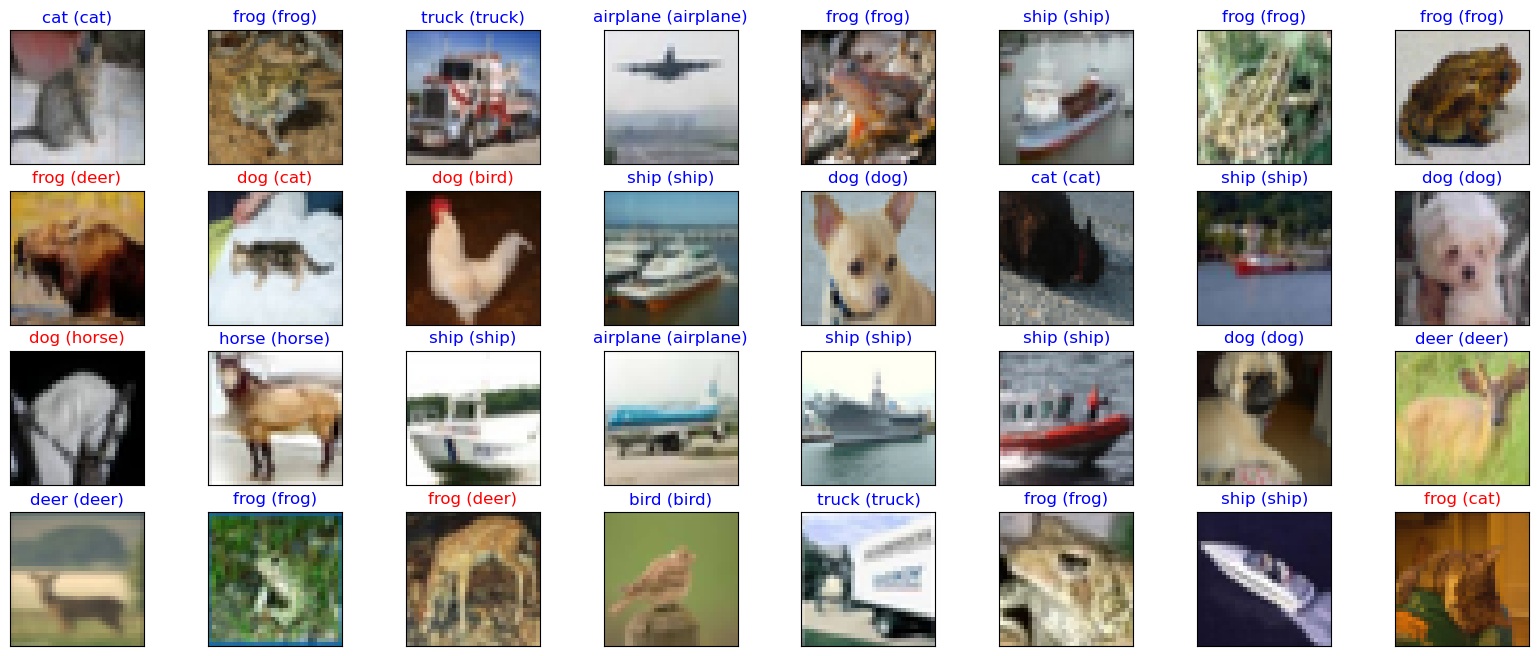

In [21]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)): #enumerate-iterate on the index
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

### evaluate test accuracy

In [23]:
# evaluate test accuracy
score = model.evaluate(x_test,y_test, verbose=0)
accuracy=100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 64.7900%


### Predicting image using the model:

In [25]:
import tensorflow as tf
img= keras.preprocessing.image.load_img (
"put your image path", target_size=(32,32,3)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf. expand_dims (img_array, 0) # Create batch axis
predictions = model.predict(img_array)
score = predictions[0]
score

FileNotFoundError: [Errno 2] No such file or directory: '/content/download jpeg'